In [19]:
from Lseg.utils.util import get_dataset

In [20]:
# two options: `ade20k` or `coco`
dataset = get_dataset(dataset_name='ade20k', get_train=True) 

	Mapping ade20k-150 -> universal
	Mapping bdd -> universal
	Mapping cityscapes-19 -> universal
	Mapping coco-panoptic-133 -> universal
	Mapping idd-39 -> universal
	Mapping mapillary-public65 -> universal
	Mapping sunrgbd-37 -> universal
	Mapping ade20k-150-relabeled -> universal
	Mapping bdd-relabeled -> universal
	Mapping cityscapes-19-relabeled -> universal
	Mapping cityscapes-34-relabeled -> universal
	Mapping coco-panoptic-133-relabeled -> universal
	Mapping idd-39-relabeled -> universal
	Mapping mapillary-public65-relabeled -> universal
	Mapping sunrgbd-37-relabeled -> universal

	Creating 1x1 conv for test datasets...
Totally 20210 samples in train set.
Checking image&label pair train list done!
image folder path: data/mseg_dataset/ADE20K/ADEChallengeData2016/
text path: mseg-api/mseg/dataset_lists/ade20k-150-relabeled/list/train.txt


In [21]:
import os
for i, (image_path, label_path) in enumerate(dataset.data_list):
    if not os.path.isfile(image_path):
        print(f"Missing image at index {i}: {image_path}")
        break


In [22]:
print(type(dataset[0][0]), type(dataset[0][1]))
print(dataset[0][0].shape, dataset[0][1].shape)

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([3, 320, 320]) torch.Size([320, 320])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


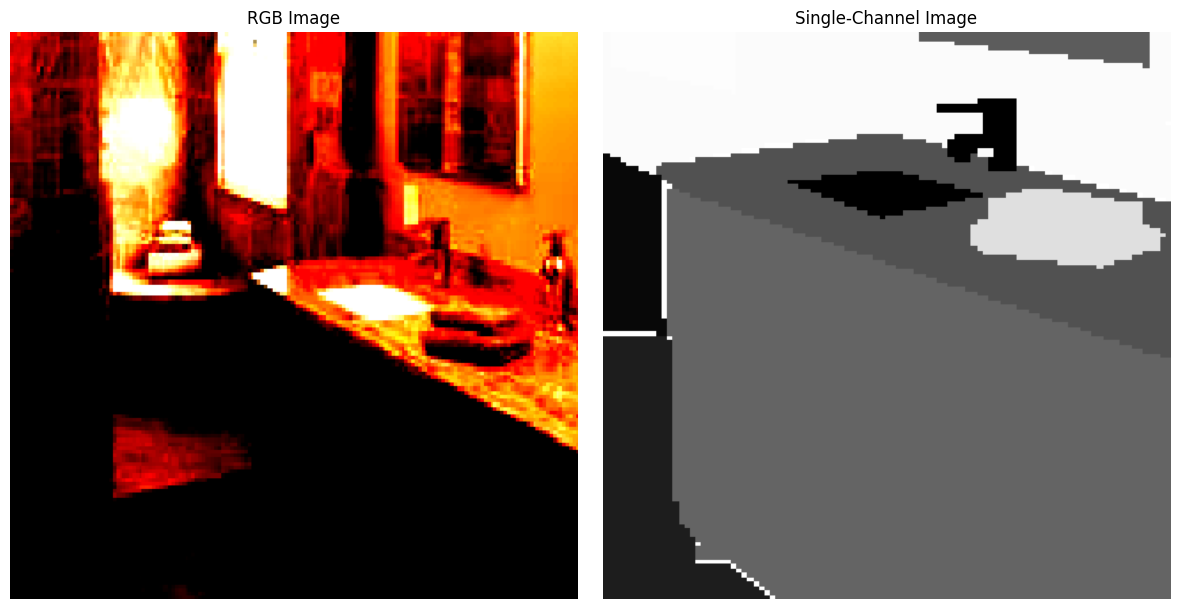

In [32]:
# Visualizing the tensors
import matplotlib.pyplot as plt
import torch

index = 21
# Convert the tensors
rgb_image = dataset[index][0].permute(1, 2, 0).numpy()  # Convert RGB image to HWC format
single_channel_image = dataset[index][1].numpy()  # Grayscale image

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot RGB image
axes[0].imshow(rgb_image)
axes[0].set_title("RGB Image")
axes[0].axis('off')  # Hide axes

# Plot single-channel image
axes[1].imshow(single_channel_image, cmap='gray')
axes[1].set_title("Single-Channel Image")
axes[1].axis('off')  # Hide axes

# Show the images
plt.tight_layout()  # Adjust layout
plt.show()


In [24]:
import torch
# obtain the number annotations for the first image
labels = torch.unique(dataset[0][1])
print(labels)

tensor([ 36,  43,  64,  89, 125, 144, 162, 163, 167, 174, 191, 194])


In [25]:
from Lseg.utils.util import ToUniversalLabel, semantic_label_tsv_path

# get the univeral labeling after all the images have been relabeled
universal_label = ToUniversalLabel.read_MSeg_master(semantic_label_tsv_path)

print(f'total number of labels {len(universal_label)} \n --------------------------------')

# get the text annotation of the first image 
print('annotations of the first image:')
for idx in labels:
    print(universal_label[int(idx)])


total number of labels 195 
 --------------------------------
annotations of the first image:
ceiling
floor
potted_plant
escalator
person
fence
column
fountain
flag
vegetation
wall
unlabeled
